# BUILD ANN MODEL

![Keras](https://miro.medium.com/max/500/1*LBjjmGofNJ_6vetddYAvIQ.jpeg)

Anda dapat membuka notebook ini di Google Colab dengan cara mengklik link di bawah ini. Untuk dapat menjalankan code di notebook ini Anda harus memiliki akun Google.

<a href="https://colab.research.google.com/github/mdsatria/boredcode/blob/master/webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pertama-tama kita perlua data

## MNIST Data

**Numpy** adalah library yang akan kita gunakan untuk memanipulasi array n-dimensi.
**Tensorflow** merupakan library yang diciptakan oleh Google Brain, yang akan menjadi library inti kita dalam membangun dan men-*serve* model ANN dalam mengenal tulisan tangan. Namun, karena Tensorflow terlalu rumit dan *verbose* untuk pemula, kita akan menggunakan **Keras**. Keras merupakan library *wrapper* dari Tensorflow. Dengan Keras, kita tetap dapat menggunakan Tensorflow dengan code yang lebih mudah dan ringkas.

**MNIST** (Modified National Institute of Standards and Technology) merupakan dataset angka dari tulisan tangan yang dibuat oleh Yann LeCun dari NYU http://yann.lecun.com/exdb/mnist/. Yann LeCun merupakan salah satu penerima Turing Award (bisa dikatakan Noble Prize untuk bidang computing) berkat jasanya di bidang AI.

![lecun](https://cdn.vox-cdn.com/thumbor/_GcNLYaaza2OU9rjKyoQa0-k4EA=/0x0:1800x1200/920x613/filters:focal(756x456:1044x744):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63307717/verge_180326_3322_0001.0.jpg)

dari kiri ke kanan : Yann LeCun, Geoffrey Hinton, Yoshua Bengio ***'The Godfather of AI'***

MNIST memiliki 60.000 data training dan 10.000 data testing. Dalam MNIST terdapat tulisan tangan berupa angka dari 0 hingga 9 (10 label/kelas)

## MNIST dari Keras

In [1]:
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Untuk memvisualisasikan data x_train dan x_test kita memerlukan modul pyplot dari library **Matplotlib**

In [3]:
import matplotlib.pyplot as plt

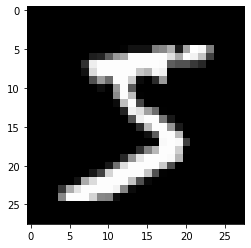

In [4]:
plt.imshow(x_train[0,:,:], cmap='gray')

## Reshape Data

$$\begin{bmatrix}
1 & 2 & 3\\ 
 4& 5 &6 \\ 
 7& 8 & 9
\end{bmatrix}$$

$$\begin{bmatrix}
1 & 2 & 3 &
 4& 5 &6 & 
 7& 8 & 9
\end{bmatrix}$$

In [5]:
reshaped_x_train = x_train.reshape(-1,784).astype(np.float32)
reshaped_x_test = x_test.reshape(-1,784).astype(np.float32)

In [6]:
# normalisasi nilai piksel
reshaped_x_train /= 255
reshaped_x_test /= 255

In [7]:
from keras.utils import to_categorical

In [8]:
n_class = 10

reshaped_y_train = to_categorical(y_train, n_class)
reshaped_y_test = to_categorical(y_test, n_class)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

## Buat Arsitektur Model

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [11]:
model.fit(reshaped_x_train, reshaped_y_train, validation_data=(reshaped_x_test, reshaped_y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.2258 - accuracy: 0.9328 - val_loss: 0.1087 - val_accuracy: 0.9661
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0914 - accuracy: 0.9722 - val_loss: 0.0873 - val_accuracy: 0.9730
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0707 - val_accuracy: 0.9775
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.1119 - val_accuracy: 0.9704
Epoch 7/10
60000/60000 [==============================] - 7s 1

In [12]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk


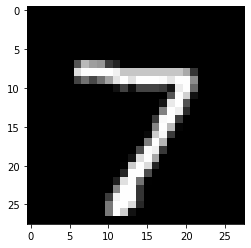

In [13]:
plt.imshow(x_test[0,:,:], cmap='gray')

In [14]:
y_test[0]

7

In [34]:
model.predict_classes(reshaped_x_test[0].reshape(1,-1))

array([7], dtype=int64)

In [35]:
pred = model.predict(reshaped_x_test[0].reshape(1,-1))
pred

array([[1.1034809e-10, 1.8465884e-09, 2.7810991e-08, 1.4456629e-07,
        4.7636587e-12, 1.5273087e-09, 2.6103663e-14, 9.9999452e-01,
        3.4510856e-09, 5.3749914e-06]], dtype=float32)

In [36]:
pred = pred.reshape(-1)

In [38]:
idx = pred.argsort()[::-1][:3]

In [39]:
for i in range (len(idx_top3)):
    print('Class {} - Prob :{}'.format(idx[i],pred[i]))

Class 7 - Prob :1.1034809177523641e-10
Class 9 - Prob :1.8465884377150132e-09
Class 3 - Prob :2.7810990843590844e-08
